# Computer Vision Tutorial

- ### Computer vision is an application of deep learning which derives information from medium files( images and videos ).
- ### OpenCV library is computer vision library available in python, cpp and java. 

- #### Index
  - Reading images and videos
  - Image transformations
  - Drawing Shapes
  - Putting texts
  - Color spaces
  - Bitwise Operations
  - Masking
  - Histogram Computation
  - Edge Detection
  - Thresholding
  - Face Detection
  - Face Recognition 

In [2]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Reading

### _Reading image_


- `imread()` method
  - It takes in the path in the `filename` argument and return a matrix type of representation of the rgb values of the image.

- The kernel usually crashes due to using the imshow function, `\x1b` is the name for the pointer to the Esc key. On pressing it, the image window is closed as it is linked with `cv.waitKey(0) & 0xFF` command 
  > ord('\x1b')=27
- There are many attributes of the _frame_ object:
  - shape[ndarray]: The first index is the height, 2nd is the width  

In [5]:
# Use 
win1= 'Akira kurosawa'

img= cv.imread('data/images/video1.jpg')
cv.imshow( win1, img )
ky= cv.waitKey(0) & 0xFF

# This is done to avoid the crashing the kernel, \x1b is sort of pointer to the Esc key. On pressing it, the image window is closed
if ky == ord('\x1b'):
  cv.destroyWindow(win1)


<class 'numpy.ndarray'>


### _Reading Video_

- #### We read video frame by frame using a while loop.

- #### `VideoCapture` class is used to get an instance of video.

- #### `while` loop is used to iterate over the frames of the video and the operations performed are as follows:
  - First reading the video frame using the method `read` of the `VideoCapture` instance.
  - Then, displaying the frame using the `imshow` method.
  - Using the `waitKey` method to set a delay time and using the `ord` method to connect with the key locations. 


In [3]:
video= cv.VideoCapture('data/videos/video1.mp4')
while (True):
  
  # Reading each frame and then showing it with the help of image show method
  isTrue, frame= video.read()
  cv.imshow('Akira Kurosawa', frame)

  # Using waitKey for delay and 0xFF for the pressing of letter d with the help of key pointer function ord
  if( (cv.waitKey(20) & 0xFF)==ord('\x1b') ):
    break

video.release()
cv.destroyAllWindows()

### _Rescaling_: It implies to change the height and width of the video/image.

- This works on all 3 types of input: _image_, _video_ and _live capture_.

In [4]:
img2= cv.imread('data/images/video1.jpg')

# Function for rescaling: Frame.shape[0] is the height of the image/video whereas Frame.shape[1] is the width of the image/video.
def rescale_frame(Frame, Scale=0.75):
  """_summary_
    Type 
  
    Args:
      Frame (_type_): _description_
      Scale (_type_): _description_

  Returns:
      _type_: _description_
  """


  width= int( Frame.shape[1] * Scale )
  height= int( Frame.shape[0] * Scale ) 
  
  new_dim= (width , height)
  return cv.resize(Frame, new_dim, interpolation= cv.INTER_AREA )

# Rescaling the image and showing
img3= rescale_frame(img2 , 0.75)
cv.imshow( 'Kurosawa',img3)

# Saving jupyter kernel from being crashing
ky= cv.waitKey( 0 ) & 0xFF
if ( ky==ord('\x1b') ):
  cv.destroyAllWindows()

### _Drawing_  

- #### We can draw on both a black image or an image selected by us:

- #### Basic coloring can be done by knowing the pixel values: (b,g,r) is the format for intensity of blue, green and red color

- #### For creating custom shapes there are methods for different shapes:
  - .rectangle_: It can be drawn by passing image name, coordinates of opposite corners, color, transparent/colored from inside by using the arguement thickness(-1)
  - _.circle_:  It is similar to rectangle with arg as _image name_, _centre_, _radius in pixels_, _color(bgr)_ and _thickness_.
  - _.line_
  - _.putText_  


In [4]:
""" Creating the numpy 3 dimensional array of width 500 px X 500 px """
# blan= np.zeros((500, 500, 3), dtype='uint8')
# cv.imshow('Blank', blan)

""" Painting the image of certain color """ 
# blan[200:300,400:450]= 0,255,0
# cv.imshow('Green', blan) 

""" Drawing a rectangle   """
# cv.rectangle(blan, (0,0), (135,135), (0,0,255), thickness=2)  # the rectangle can be filled by giving thickness value to be cv.FILLED/-1
# cv.imshow('Rectangle',blan)

"""  Drawing Circle """
# cv.circle(blan, (blan.shape[1]//2, blan.shape[0]//2), 30, (255, 0, 0), thickness=-1) # arguments: (image, centre coordinates, radius size, color(bgr tuple), thickness) 
# cv.imshow('Circle', blan)

"""  Drawing Line """
# cv.line(blan, (0,0), (100,100), (0,255,0), thickness=2)
# cv.imshow('Line', blan)

""" Writing text on the image """
# cv.putText(blan, 'Hi, My name is Uday', (30,200), cv.FONT_HERSHEY_TRIPLEX, 0.8,  (0,255,0), thickness=2) # ARG: (image name, Text, starting spot, font type(from cv options), font scale, color, thickness)
# cv.imshow('Final', blan)

# ky= cv.waitKey( 0 ) & 0xFF
# if ( ky==ord('\x1b') ):
  # cv.destroyAllWindows()

### Some Common functions


- Converting to grayscale
- Applying Gaussian Blur
- Edge Cascading
- Dilating
- Eroding
- Resizing and Cropping 


In [5]:
# img1= cv.imread('data/Photos/park.jpg')
# cv.imshow('Cat',img1)

""" Converting image to Gray Scale """
# gimg1= cv.cvtColor(img1, cv.COLOR_BGR2GRAY) # ARG: (image object, Color code[Coversion code])
# cv.imshow('Gray Cat', gimg1)

""" Applying Gaussian Blur"""
# blur= cv.GaussianBlur(img1, (3,3), cv.BORDER_DEFAULT) # ARG: (image object, kernel size, option) 
# cv.imshow('Blur-image', blur)

# blur2= cv.GaussianBlur(img1, (7,7), cv.BORDER_DEFAULT) # Blur can be increased by increasing kernel size 
# cv.imshow('Blur-image', blur2)

""" Edge Cascading: Trying to find the edges present in the image. Canny edging is used here. """
# canny= cv.Canny(blur2, 125, 175) # We can reduce the number of canny edges by using the blur instead of original image
# cv.imshow('Canny Edge', canny)

""" Dilating the image[using the edges as the structuring element] """
# dil= cv.dilate(canny, (7,7), iterations=3)
# cv.imshow("Dilated", dil)

""" Eroding the dilated image """
# erd= cv.erode(dil, (3,3), iterations=1)
# cv.imshow("Eroded-image", erd)

""" Resizing and Cropping an image """
# res= cv.resize(img1, (500,500)) # The default interpolation method is cv.INTER_AREA[suited for shrinking an image to lower dimension, other options: INTER_LINEAR, INTER_CUBIC ]
# cv.imshow("Resized", res)

# crp= img1[100:500, 100:300]
# cv.imshow("Cropped", crp)

# ky= cv.waitKey( 0 ) & 0xFF
# if ( ky==ord('\x1b') ):
#   cv.destroyAllWindows()

### Image Transformations

In [12]:
img1= cv.imread('data/Photos/cat.jpg')
cv.imshow("Normal",img1)

""" Translation: Moving the image """
# def translation(image, x, y):

#   mat_trans= np.float32([ [1,0,x], [0,1,y]  ] )       # creating the translation matrix
#   dim= (image.shape[1], image.shape[0] )      # getting dimensions for the translated image
#   return cv.warpAffine( image, mat_trans, dim )       # warping the image finally

# tr_img= translation(img1, 100, -100)        # Centre is at top left corner with +x axis to the right and +y axis to the bottom
# cv.imshow("Translated", tr_img)

""" Rotating the image """
# def rotate(img, ang, CoR):
  
#   (height, width)= img.shape[:2]
#   if CoR is None:
#     CoR= (width//2, height//2)

#   mat_rot= cv.getRotationMatrix2D(CoR, ang, 1.0 )
#   dim= (width, height) 

#   return cv.warpAffine(img, mat_rot, dim)

# rot_img= rotate(img1, -90, None)    # + angle for anticlockwise and - angle for clockwise
# cv.imshow("Rotated image", rot_img)

""" Resizing the image"""
# resized= cv.resize(img1, (500,500), interpolation= cv.INTER_AREA)
# cv.imshow("Resized image", resized)

""" Flipping the image"""
# flip_img= cv.flip(img1, 1)    # 0: Flipping vertically, 1: flipping horizontally, -1: flipping both ways
# cv.imshow("Flipped", flip_img)

# ky= cv.waitKey( 0 ) & 0xFF
# if ( ky==ord('\x1b') ):
#   cv.destroyAllWindows()

### Contour Detection 

- #### Contours are curves joining all continuous points having same intensity/color(Can be used in shape analysis, object detection).

- #### There is also the method `drawContours` which can be used to draw contours on the image.

In [4]:
img1= cv.imread('data/Photos/park.jpg')
cv.imshow('Org', img1)

gimg= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gimg)

""" 1. Here, Gaussian blur reduces the noise, using the canny edge technique, it reduces the number of contours which will appear later."""
# bimg= cv.GaussianBlur(gimg, (5,5), cv.BORDER_DEFAULT)
# cv.imshow('Blur', bimg)

# canny= cv.Canny(bimg, 124, 174)
# cv.imshow("Canny Edges", canny)

""" 2. Threshold technique: It binarises the pixel. so if it is below 125, it is lead to 0(black) """
ret, thresh= cv.threshold( gimg, 125, 255, cv.THRESH_BINARY )
cv.imshow("Threshold", thresh)

""" It looks at the structuring element i.e. edges found and returns two values: contours[list of coordinates of contours found] and heirarchies[refers to heirarchial representation of contours ] """
contours, heirarchy= cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_NONE )   # RETR_LIST: returns all contours, RETR_EXTERNAL: returns external contours, RETR_TREE: returns all heirarchial contours. CHAIN_APPROX is method through which we are approximating the contours[NONE, SIMPLE]
print(len(contours))

ky= cv.waitKey(0) & 0XFF
if ky==ord('\x1b'):
  cv.destroyAllWindows()

<class 'float'>
1138


### Colorspaces

- #### opencv default's colorspace of reading is bgr. Compared to other libraries such as matplotlib which use RGB format, it is different and has functions which help in doing the conversion.

- #### The following Colorspace are available and their respective coversions too
  - BGR(default)
  - RGB
  - GrayScale
  - LAB
  - HSV(Hue Saturation Value)

In [5]:
# img1= cv.imread('data/Photos/park.jpg')
# cv.imshow('Org', img1)

""" BGR to grayscale """
# gimg1= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gimg1)

""" BGR to HSV"""
# himg1= cv.cvtColor(img1, cv.COLOR_BGR2HSV )     # Hue Saturation Value
# cv.imshow('HSV', himg1)

""" BGR to LAV"""
# limg1= cv.cvtColor(img1, cv.COLOR_BGR2LAB)
# cv.imshow('LAB', limg1)

""" BGR to RGB"""
# cimg1= cv.cvtColor(img1, cv.COLOR_BGR2RGB )
# cv.imshow('RGB', cimg1)

# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()

### Color Channels

- #### Channels are Red, Green and Blue.

In [10]:
# img1= cv.imread('data/Photos/park.jpg')
# cv.imshow('Org',img1)

""" Splitting the image in its three color channels"""
# b,g,r= cv.split(img1)
# cv.imshow('Blue',b)
# cv.imshow('Green',g)
# cv.imshow('Red',r)

""" Merging the b, g,r color channels, we can get the previous image back"""
# merge= cv.merge([g,b,r])
# cv.imshow('Merge', merge)

# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()

### Blurring Techniques

- #### We blur an image mostly when there is a lot of noise(caused due to camera sensors, problems in lighting) in the image.

- #### Blur means creating a kernel of size nXn[n is odd], and some operation is applied on the middle pixel due to the pixels surrounding it.

- #### There are many Blurring techniques:
  - Gaussian Blur(most Popular one)
  - 

In [2]:
# img1= cv.imread('data/Photos/park.jpg')
# cv.imshow('Org', img1)

""" Averaging: Pixel intensity will be the average of all the pixel intensities of the pixels around it """
# avg= cv.blur(img1, (3,3))
# cv.imshow('Blur: Average', avg)

""" Gaussian Blur: Each surrounding pixel is given a particular weight and then the sum is done"""
# gau= cv.GaussianBlur(img1, (3,3), 0)
# cv.imshow('Blur: Gaussian', gau)

""" Median Blur"""
# med= cv.medianBlur(img1, 3)
# cv.imshow('Blur: Median', med)

""" Bilateral Blurring"""
# bil= cv.bilateralFilter(img1, 5,  15, 15)
# cv.imshow('Blur: Bilateral', bil)

# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()

### Bitwise Operations

- #### (and, or, xor, not). They are used extensively in image processing[masking] 

In [8]:
# blank= np.zeros( (400,400), dtype='uint8')

# rec= cv.rectangle( blank.copy(), (30,30), (370,370), 255, -1)
# cir= cv.circle( blank.copy(), (200,200), 200, 255, -1)

# cv.imshow('Rectangle',rec)
# cv.imshow('Circle',cir)

""" bitwise AND: displays the intersecting region """
# nd= cv.bitwise_and(rec, cir)
# cv.imshow("bitwise and", nd)

""" bitwise OR: returns the union of regions"""
# bitor= cv.bitwise_or(rec, cir)
# cv.imshow('bitwise OR',bitor)

""" bitwise XOR: returns non-intersecting regions """
# bitxor= cv.bitwise_xor(rec, cir)
# cv.imshow('bitwise XOR', bitxor)

""" bitwise NOR: Applies nor to the region """
# bitnor= cv.bitwise_not(cir)
# cv.imshow('bitwise nor', bitnor)

# ky= cv.waitKey(0) & 0XFF
# if( ky==ord('\x1b')):
# 
  # cv.destroyAllWindows()

### Masking

- #### It allows us to focus on certain part of images.

In [2]:
# img1= cv.imread('data/Photos/cats.jpg')
# cv.imshow('Org', img1)

""" Creating a mask in the form of circle"""
# blank= np.zeros( img1.shape[:2], dtype='uint8' )
# mask= cv.circle(blank, (img1.shape[1]//2 +100, img1.shape[0]//2), 100, 255, -1)
# cv.imshow("Mask", mask)

# masked= cv.bitwise_and(img1, img1, mask=mask)
# cv.imshow("masked",masked)

""""""
# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()
# 

### Computing Histograms

- #### It allows us to visualized the visual intensity distribution in the images.

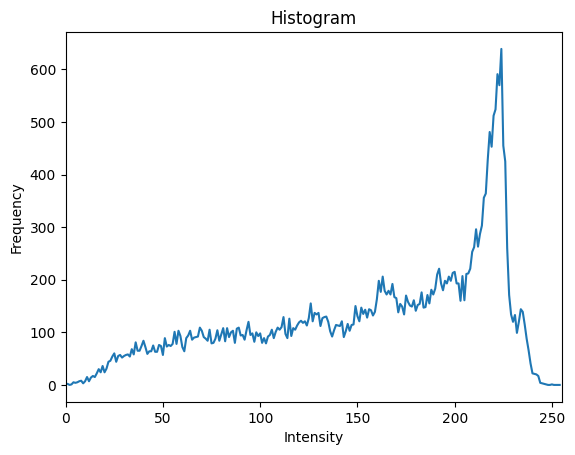

In [6]:
# img1= cv.imread( "data/Photos/cats 2.jpg" )
# cv.imshow( "Org", img1)
# 
""" 
1. Below, we have used the histogram function to get the histogram of intensities[can be done manually too]. 
2. Masking can also be applied in this function to get the intensity histogram for a specific area in the photo.
"""
# 
# gimg1= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# 
# blank= np.zeros(img1.shape[:2], dtype='uint8')
# mask= cv.circle(blank, (img1.shape[1]//2, img1.shape[0]//2), 100, 255, -1 )
# masked= cv.bitwise_and(gimg1, gimg1, mask=mask)
# cv.imshow("Masked", mask)
# 
# hist= cv.calcHist([gimg1], [0], masked, [255], [0,256] )
# 
# plt.figure()
# plt.title('Histogram')
# plt.xlabel('Intensity'); plt.ylabel('Frequency')
# plt.plot(hist)
# plt.xlim([0,255])
# plt.show()
# 
# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()

### Thresholding

- #### It is binarisation of an image[converting to a binary image] i.e. either the pixel value is 0/255. 

- #### In this, we take a threhold value and check for each pixel value if it greater than this threshold value/not and changing them 0/255.

In [3]:
img1= cv.imread('data/Photos/cat.jpg')
# cv.imshow("Org", img1)

gimg1= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv.imshow("Gray image", gimg1)

""" Simple Thresholding  """
threshold, thrimg= cv.threshold(gimg1, 150, 255, cv.THRESH_BINARY)
cv.imshow("Simple Threshold",thrimg)

""" Inverse Thresholding: Values greater than threshold are set to 0 """
threshold, invthrimg= cv.threshold(gimg1, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow("Inverse Threshold",invthrimg)

""" Adaptive Thresholding: Computer finds out optimal threshold value """
adpthrimg= cv.adaptiveThreshold(gimg1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2.5 )
cv.imshow("Adaptive thresholding", adpthrimg)

adpthrimg= cv.adaptiveThreshold(gimg1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 21, 2.5)
# cv.imshow("Adaptive Inverse thresholding", adpthrimg)

ky= cv.waitKey(0) & 0XFF
if(ky==ord('\x1b')):
  cv.destroyAllWindows()

### Gradients and Edge detection

- #### Gradient and Edges are different mathematically but can be considered same in programming.

- #### Apart from Canny, there are other methods to get edges:
  - _Laplacian_: It looks like the original image is smudged over by a pencil.
    - It calculates the gradients in the image.
    - Ther
  
  - _Sobel_: It computes the gradients in x and y directions
    -    

- ####
- ####


In [5]:
# img1= cv.imread('data/Photos/cats.jpg')
# cv.imshow("Org", img1)

# gimg1= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

""" Laplacian  """
# lap= cv.Laplacian( gimg1, cv.CV_64F )
# lap= np.uint8(np.absolute(lap))
# cv.imshow("Laplacian", lap)
# 
""" Sobel  """
# sobelx= cv.Sobel(gimg1, cv.CV_64F, 1, 0)
# sobely= cv.Sobel(gimg1, cv.CV_64F, 0, 1)
# cv.imshow("Sobel X", sobelx)
# cv.imshow("Sobel Y", sobely)
# combs= cv.bitwise_or(sobelx, sobely)
# cv.imshow("combined", combs)

""" Canny: One of its stage uses Sobel"""
# Canny= cv.Canny(gimg1, 150,175)
# cv.imshow("Canny", Canny)

# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()

### Face Detection

- #### Face detection only involves the presence of face in an image(recognition means identifying whose face is in that image.)

- #### Two main pre-trained classifier are haarcascades and more advanced, Local Binary Patterns.

- #### Haarcascade frontal classifier is taken from [openCV repository](https://github.com/opencv/opencv/blob/4.x/data/haarcascades/)

In [7]:
# pers= cv.imread('data/Photos/group 1.jpg')
# gpers= cv.cvtColor(pers, cv.COLOR_BGR2GRAY)
# cv.imshow("Person", gpers)

# haar_cas= cv.CascadeClassifier('haar_frontalface.xml')

# faces_rect= haar_cas.detectMultiScale(gpers, scaleFactor=1.1, minNeighbors=1)   # Returns rectangular coordinates as a list, by minimizing the minNeighbors we are makign our classifier more prone to noise.
# print(f"Number of faces found: {len(faces_rect)}")

# faces= []
# for (x,y,w,h) in faces_rect:
  # cv.rectangle(  pers, (x,y), (x+w,y+h), (0,255,0), thickness=2)

# cv.imshow("Detected",pers)

# ky= cv.waitKey(0) & 0XFF
# if(ky==ord('\x1b')):
  # cv.destroyAllWindows()

Number of faces found: 19


### Face Recognizer

In [3]:
dir='data/Faces/train'
people= []

for i in os.listdir(dir):
  people.append(i)

haar_cas= cv.CascadeClassifier( 'data/haar_classifiers/haar_frontalface.xml' )

features= []; labels= [ ]
def create_train():

  for per in people:

    path= os.path.join(dir, per)
    label= people.index(per)    # Returns the first position at which per is found in people

    for imgp in os.listdir( path ):

      imgpath= os.path.join(path, imgp)
      image1= cv.imread( imgpath )
      gimg1= cv.cvtColor( image1, cv.COLOR_BGR2GRAY )

      faces_rect= haar_cas.detectMultiScale(gimg1, scaleFactor=1.1, minNeighbors=4 )

      for (x,y,w,h) in faces_rect:

        faces_roi= gimg1[y:y+h,x:x+w]
        features.append( faces_roi ); labels.append(label)

create_train()

features= np.array(features, dtype='object')
labels= np.array( labels )

facerecognizer= cv.face.LBPHFaceRecognizer_create()

# Training the recognizer
facerecognizer.train( features, labels )

# Saving all the information
facerecognizer.save('face_trained.yml')
np.save('features.npy', features, allow_pickle=True)
np.save('labels.npy', labels, allow_pickle=True )

ky= cv.waitKey(0) & 0XFF
if(ky==ord('\x1b')):
  cv.destroyAllWindows()

In [4]:
# Initializing the classifier from the xml file
haar_cascade= cv.CascadeClassifier('haar_frontalface.xml')

# Loading features and labels
features= np.load('features.npy', allow_pickle=True)
labels= np.load('labels.npy', allow_pickle=True )

# Reading the training data
faceRecognizer= cv.face.LBPHFaceRecognizer_create()
faceRecognizer.read('face_trained.yml')

test_img= cv.imread('data/Faces/val/elton_john/1.jpg')
gtest_img= cv.cvtColor(test_img, cv.COLOR_BGR2GRAY )
cv.imshow('Person', gtest_img)

# Detect the face in the image
faces_rect= haar_cascade.detectMultiScale(gtest_img, scaleFactor=1.1, minNeighbors=4)
for (x,y,w,h) in faces_rect:
  
  face_roi= gtest_img[y:y+h,x:x+h]
  
  label, confidence= faceRecognizer.predict(face_roi)
  print(f"Label={people[label]} with Confidence={confidence}")

  cv.putText(test_img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,0,255), thickness=2 )
  cv.rectangle( test_img, (x,y), (x+w,y+h), (0,0,255), thickness=2 )

cv.imshow("Final Result", test_img)

ky= cv.waitKey(0) & 0XFF
if(  ky==ord('\x1b') ):
  cv.destroyAllWindows()

Label=Elton John with Confidence=67.00856809674691
